In [3]:
from torch import nn # need to add this additional line because nn was not found.
import torch
import torch.nn.functional as F
import helper

In [6]:
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])
# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [11]:

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Defining the layers, 128, 64, 10 units each
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        # Output layer, 10 units - one for each digit
        self.fc3 = nn.Linear(64, 10)
        
    def forward(self, x):
        ''' Forward pass through the network, returns the output logits '''
        
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.softmax(x, dim=1)
        
        return x

model = Network()
model


Network(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

In [12]:
print(model.fc1.weight)
print(model.fc1.bias)


Parameter containing:
tensor([[ 0.0131,  0.0134,  0.0356,  ..., -0.0148,  0.0054,  0.0219],
        [-0.0007, -0.0072,  0.0010,  ..., -0.0117,  0.0339,  0.0195],
        [-0.0153, -0.0253,  0.0067,  ..., -0.0232,  0.0085, -0.0109],
        ...,
        [-0.0059,  0.0268,  0.0259,  ...,  0.0067,  0.0053, -0.0257],
        [ 0.0027, -0.0011,  0.0187,  ..., -0.0121, -0.0357, -0.0088],
        [ 0.0040, -0.0280, -0.0020,  ..., -0.0057,  0.0046,  0.0162]],
       requires_grad=True)
Parameter containing:
tensor([-0.0150,  0.0093, -0.0172, -0.0013, -0.0031,  0.0125,  0.0266, -0.0101,
        -0.0146, -0.0297,  0.0233, -0.0303, -0.0322, -0.0301,  0.0020,  0.0216,
         0.0134, -0.0262,  0.0091,  0.0104, -0.0244, -0.0227,  0.0232, -0.0157,
        -0.0018,  0.0334, -0.0132,  0.0272, -0.0236, -0.0228,  0.0247, -0.0255,
         0.0052,  0.0044, -0.0156, -0.0067,  0.0333,  0.0352,  0.0051,  0.0322,
         0.0165,  0.0328,  0.0280, -0.0110, -0.0212,  0.0172,  0.0082, -0.0144,
        -0.0109

In [13]:
# Set biases to all zeros
model.fc1.bias.data.fill_(0)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.])

In [14]:
# sample from random normal with standard dev = 0.01
model.fc1.weight.data.normal_(std=0.01)

tensor([[-0.0108, -0.0060, -0.0125,  ..., -0.0019,  0.0058,  0.0139],
        [-0.0031,  0.0018,  0.0056,  ...,  0.0120,  0.0024, -0.0119],
        [-0.0014,  0.0008,  0.0115,  ...,  0.0131, -0.0056, -0.0022],
        ...,
        [-0.0109,  0.0039, -0.0199,  ..., -0.0144, -0.0004, -0.0000],
        [-0.0045,  0.0231,  0.0062,  ..., -0.0103,  0.0105,  0.0052],
        [ 0.0072,  0.0032,  0.0153,  ..., -0.0075,  0.0088,  0.0152]])

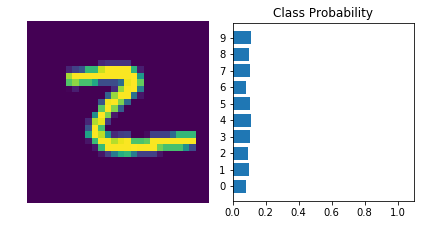

In [15]:
# Grab some data 
dataiter = iter(trainloader)
images, labels = dataiter.next()

# Resize images into a 1D vector, new shape is (batch size, color channels, image pixels) 
images.resize_(64, 1, 784)
# or images.resize_(images.shape[0], 1, 784) to automatically get batch size

# Forward pass through the network
img_idx = 0
ps = model.forward(images[img_idx,:])

img = images[img_idx]
helper.view_classify(img.view(1, 28, 28), ps)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax()
)


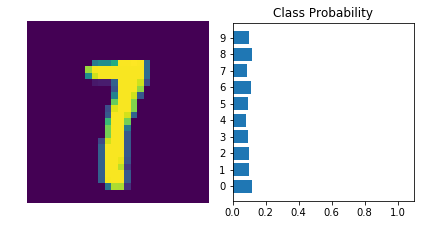

In [7]:
# Hyperparameters for our network
input_size = 784
hidden_sizes = [128, 64]
output_sizes = 10

# Build a feed-forward network
model =  nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                       nn.ReLU(),
                       nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                       nn.ReLU(),
                       nn.Linear(hidden_sizes[1], output_sizes),
                       nn.Softmax(dim=1))
print(model)

# Forward pass through the network and display output
images, labels = next(iter(trainloader))
images.resize_(images.shape[0], 1 , 784)
ps = model.forward(images[0,:])
helper.view_classify(images[0].view(1,28,28), ps)


In [8]:
print(model[0])
model[0].weight

Linear(in_features=784, out_features=128, bias=True)


Parameter containing:
tensor([[-0.0016,  0.0278,  0.0313,  ..., -0.0198,  0.0288, -0.0228],
        [ 0.0018,  0.0317, -0.0297,  ..., -0.0004, -0.0200,  0.0121],
        [ 0.0210, -0.0221,  0.0025,  ..., -0.0220,  0.0265, -0.0282],
        ...,
        [-0.0333,  0.0017,  0.0216,  ...,  0.0228,  0.0314,  0.0260],
        [-0.0255,  0.0096,  0.0111,  ..., -0.0112,  0.0051, -0.0016],
        [-0.0172,  0.0104, -0.0029,  ..., -0.0027,  0.0066,  0.0355]],
       requires_grad=True)

In [10]:
from collections import OrderedDict
model = nn.Sequential(OrderedDict([
                    ('fc1', nn.Linear(input_size, hidden_sizes[0])),
                    ('relu1', nn.ReLU()),
                      ('fc2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
                      ('relu2', nn.ReLU()),
                      ('output', nn.Linear(hidden_sizes[1], output_sizes)),
                      ('softmax', nn.Softmax(dim=1))]))
model

Sequential(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (output): Linear(in_features=64, out_features=10, bias=True)
  (softmax): Softmax()
)

In [11]:
print(model[0])
print(model.fc1)

Linear(in_features=784, out_features=128, bias=True)
Linear(in_features=784, out_features=128, bias=True)
